In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import torch
from torch import nn, tensor
from torchvision import models
from torchsummary import summary
from matplotlib import pyplot as plt
# Torch model visualization package
import torchviz

## PyTorch Tutorial Outline
- torch.Tensor
- torch.nn.Module
- torch.nn.Linear
- module.parameters
- Forward
- Backward


- torch.nn.ReLu
- torch.nn.Sigmoid
- Loss Function
- Optimizer
- Training Loop

In [3]:
t = torch.tensor([1.,2.,3.], requires_grad=True)
t

tensor([1., 2., 3.], requires_grad=True)

In [4]:
torch.Tensor

torch.Tensor

In [5]:
# Torch.tensor: 

# Can create from lists:
print(torch.Tensor([1,2,3,]))
print(torch.Tensor([[1], [2], [3]]))

# Can create from numpy arrays:
print(torch.Tensor(np.array([1, 2, 3])))

# Can convert to numpy arrays:
print(torch.Tensor([1, 2, 3]).numpy())

# Can be more than two dimensional:
three_d_tensor = torch.Tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(three_d_tensor)

#Api similar to numpy:
print(three_d_tensor.shape)

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])
tensor([1., 2., 3.])
[1. 2. 3.]
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])
torch.Size([2, 2, 2])


In [6]:
# torch.nn.Module
module = torch.nn.Module()

In [7]:
class MyLinear(nn.Module):
  def __init__(self, num_dims):
    super(MyLinear, self).__init__()
    self.weight = torch.nn.Parameter(torch.empty((num_dims)))
    self.bias = torch.nn.Parameter(torch.empty(1))

  def forward(self, x):
    return self.weight * x + self.bias
linear = MyLinear(2)
res = linear.forward(torch.Tensor([1, 1]))

In [ ]:
# torch.nn.Linear
layer = nn.Linear(2, 1)
# Looking at the weight data directly:
print(layer.weight.data)
print(layer.bias.data)

In [ ]:
# w * x + b
layer = nn.Linear(2, 2)
# w is the weights
print(layer.weight.data)
# b is the bias term
print(layer.bias.data)
# forward: w * x + b
layer.forward(torch.Tensor([1., 1.]))

tensor([[0.4815, 0.3710],
        [0.2758, 0.2632]])
tensor([-0.3787, -0.4860])


tensor([0.4738, 0.0530], grad_fn=<AddBackward0>)

In [ ]:
x1 = 1.
x2 = 1.
-0.5117 + 0.6573 * x1 + (- 0.6999)*x2

-0.5543

In [ ]:
class MyLinear(torch.nn.Module):
  def __init__(self, num_dims):
    super(MyLinear, self).__init__()
    self.weight = torch.nn.Parameter(torch.randn(num_dims))
    self.bias = torch.nn.Parameter(torch.randn(1))

  def forward(self, x):
    return self.weight.dot(x) + self.bias
linear = MyLinear(2)
#res = linear.forward(torch.Tensor([1, 1]))
print(linear.weight)
print(linear.bias)
linear.forward(torch.Tensor([1., 1.]))

Parameter containing:
tensor([0.3602, 1.6975], requires_grad=True)
Parameter containing:
tensor([0.0051], requires_grad=True)


tensor([2.0628], grad_fn=<AddBackward0>)

In [ ]:
torch.randn(2)

tensor([1.0143, 0.6837])

In [ ]:
# Initialize the weights to something else:
nn.init.ones_(layer.weight)
nn.init.ones_(layer.bias)
print(layer.weight.data)
print(layer.bias)

In [ ]:
# You can also access these via parameters
for p in layer.parameters():
    print(p)

In [ ]:
# 
inputs = torch.Tensor([[1, 1], [1, 1]])
print(layer.forward(inputs))
print(layer.bias)

In [ ]:
x = torch.tensor(1.0)
x

tensor(1.)

tensor(0.0133)
tensor(0.0066)
tensor(0.0066)
tensor(0.9933, grad_fn=<SigmoidBackward0>)


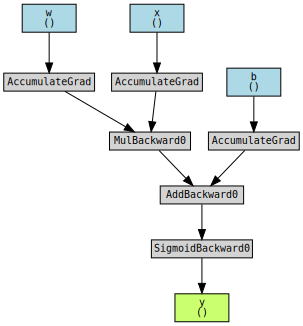

In [ ]:
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)
y = torch.nn.Sigmoid()(w * x + b)
y.backward()
print(x.grad)
print(w.grad)
print(b.grad)
print(y)
torchviz.make_dot(y, {'x': x, 'w': w, 'b': b, 'y': y})

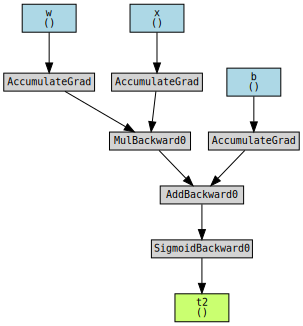

In [ ]:
t2 = torch.nn.Sigmoid()(w * x + b)
t2.backward()
torchviz.make_dot(t2, {'x': x, 'w': w, 'b': b, 't2': t2})

In [ ]:
y = torch.nn.Sigmoid()(w * x + b)

y.backward()
y

tensor(0.9933, grad_fn=<SigmoidBackward0>)

In [ ]:
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)
y = torch.nn.Sigmoid()(w * x + b)
loss = torch.nn.BCELoss()(y, torch.Tensor([1.]).squeeze())
loss.backward()
torchviz.make_dot(loss, {'x': x, 'w': w, 'b': b, 'y': y, 'loss': loss})

In [ ]:
torch.Tensor([1.]).size()
y.size()

In [ ]:
# 2 hidden layers, the first has 3 units the second has 2 units
class TorchOneLayerNN(torch.nn.Module):
    def __init__(self, input_dimensions, hidden_size1, hidden_size2):
        super(TorchOneLayerNN, self).__init__()
        self.z1 = torch.nn.Linear(input_dimensions, hidden_size1)
        self.a1 = torch.nn.ReLU()
        self.z2 = torch.nn.Linear(hidden_size1, hidden_size2)
        self.a2 = torch.nn.ReLU()        
        self.z3 = torch.nn.Linear(hidden_size2, 1)
        self.a3 = torch.nn.Sigmoid()

    def forward(self, x):
        print(x)
        z1 = self.z1(x)
        print(z1)
        a1 = self.a1(z1)
        print(a1)
        z2 = self.z2(a1)
        print(z2)
        a2 = self.a2(z2)
        print(a2)
        z3 = self.z3(a2)
        print(z3)
        a3 = self.a3(z3)
        print(a3)
        return a3

In [ ]:
network = TorchOneLayerNN(3, 3, 2)

In [ ]:
y_true = torch.Tensor([[1.], [0.]])
y_prediction = network(torch.Tensor(
    [
        [1., 1., 1.],
        [0., .3, .2],
    ]
))

loss_function = torch.nn.BCELoss() 
loss = loss_function(y_prediction, y_true)

tensor([[1.0000, 1.0000, 1.0000],
        [0.0000, 0.3000, 0.2000]])
tensor([[-0.4833, -0.3240, -0.3081],
        [-0.1868, -0.1343, -0.1705]], grad_fn=<AddmmBackward0>)
tensor([[0., 0., 0.],
        [0., 0., 0.]], grad_fn=<ReluBackward0>)
tensor([[0.1913, 0.1325],
        [0.1913, 0.1325]], grad_fn=<AddmmBackward0>)
tensor([[0.1913, 0.1325],
        [0.1913, 0.1325]], grad_fn=<ReluBackward0>)
tensor([[-0.6166],
        [-0.6166]], grad_fn=<AddmmBackward0>)
tensor([[0.3506],
        [0.3506]], grad_fn=<SigmoidBackward0>)


In [ ]:
for i in network.parameters():
    print(i.data)

tensor([[-0.2644,  0.2793, -0.2845],
        [-0.2612, -0.2836,  0.3377],
        [-0.1832, -0.2582,  0.2830]])
tensor([-0.2137, -0.1168, -0.1496])
tensor([[ 0.3045, -0.2191,  0.1101],
        [ 0.0804,  0.2512, -0.0102]])
tensor([0.1913, 0.1325])
tensor([[ 0.1437, -0.3127]])
tensor([-0.6027])


In [ ]:
network.z1.weight.grad

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
optimizer = torch.optim.SGD(network.parameters(), lr=1e-1)


tensor([[-0.0286, -0.0198]])

In [ ]:
torch.Tensor([-0.2644,  0.2793, -0.2845]).dot(torch.Tensor([1., 1., 1.])) + -0.2137

tensor(-0.4833)

In [ ]:
network.z2.weight

Parameter containing:
tensor([[ 0.3045, -0.2191,  0.1101],
        [ 0.0804,  0.2512, -0.0102]], requires_grad=True)

## Heart Disease Classification with Pytorch

In [ ]:
# Load the heart disease dataset:
columns = ['Age', 'Oldpeak', 'MaxHR', 'HeartDisease']
heart_disease_dataframe = pd.read_csv("../data/heart.csv")[columns]

# Select out X and Y
X = heart_disease_dataframe[['Age', 'Oldpeak', 'MaxHR']].values
y = heart_disease_dataframe['HeartDisease'].values

# Apply standard scaler to X.
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train_tensor = torch.Tensor(torch.from_numpy(X_train.astype(np.float32)))
y_train_tensor = torch.Tensor(torch.from_numpy(y_train.astype(np.float32))).reshape(-1,1)
X_test_tensor = torch.Tensor(torch.from_numpy(X_test.astype(np.float32)))
y_test_tensor = torch.Tensor(torch.from_numpy(y_test.astype(np.float32))).reshape(-1,1)

In [ ]:
X_train_tensor

tensor([[ 0.4762, -0.7386,  0.7542],
        [ 0.7944,  1.0438, -1.1322],
        [-0.0542, -0.8324, -0.5820],
        ...,
        [ 0.6883,  0.4809,  0.2826],
        [ 0.6883, -0.8324, -0.7392],
        [-1.4331,  1.0438, -0.2676]])

In [ ]:
class TorchLogisticRegression(torch.nn.Module):
    def __init__(self, input_dimensions):
        super(TorchLogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dimensions, 1)
        self.output = torch.nn.Sigmoid()

    def forward(self, x):
        output = self.output(self.linear(x))
        return output
    
# Logistic Regression:
# 1 / (1 + exp(-(x_1 * w_1 + ... + b)))
# = Sigmoid(x_1 * w_1 + ... + b)
# = Sigmoid(Linear(x))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 1]               4
           Sigmoid-2                 [-1, 1, 1]               0
Total params: 4
Trainable params: 4
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 1]               4
           Sigmoid-2                 [-1, 1, 1]               0
Total params: 4
Trainable params: 4
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


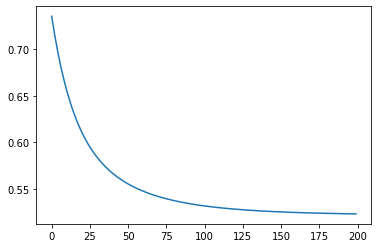

In [ ]:
model = TorchLogisticRegression(3)
summary(model, (1, 3)) 
loss_function = torch.nn.BCELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

errors = []
for epoch in range(200):  
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = loss_function(outputs, y_train_tensor)
    errors.append(loss.item())
    loss.backward(retain_graph=True)
    #print(model.linear.weight.data, model.linear.bias.data)
    optimizer.step()
plt.plot(errors)

In [ ]:
y_predicted_train = model(X_train_tensor)
y_predicted_test = model(X_test_tensor)
final_loss_train = loss_function(y_predicted_train, y_train_tensor)
final_loss_test = loss_function(y_predicted_test, y_test_tensor)
print(f"Final loss: train: {final_loss_train}, test: {final_loss_test}")

y_predicted_train_classes = (y_predicted_train.detach().numpy() > 0.5).astype(float)
y_predicted_test_classes = (y_predicted_test.detach().numpy() > 0.5).astype(float)
train_accuracy = metrics.accuracy_score(y_train, y_predicted_train_classes)
test_accuracy = metrics.accuracy_score(y_test, y_predicted_test_classes)
print(f"Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

Final loss: train: 0.5231859683990479, test: 0.5333408117294312
Train Accuracy: 0.7523364485981309, Test Accuracy: 0.717391304347826


In [ ]:

class TorchNN(torch.nn.Module):
    def __init__(self, input_dimensions, num_hidden_units=10):
        super(TorchNN, self).__init__()
        self.linear = torch.nn.Linear(input_dimensions, num_hidden_units)
        self.relu1 = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(num_hidden_units, 1)
        self.output = torch.nn.Sigmoid()

    def forward(self, x):
        z1 = self.linear(x)
        a1 = self.relu1(z1)
        z2 = self.linear2(a1)
        return self.output(z2)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 10]              40
              ReLU-2                [-1, 1, 10]               0
            Linear-3                 [-1, 1, 1]              11
           Sigmoid-4                 [-1, 1, 1]               0
Total params: 51
Trainable params: 51
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


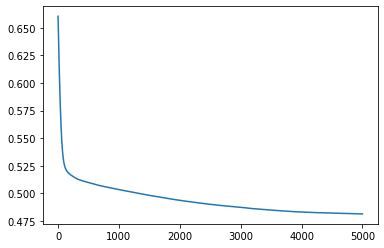

In [ ]:
model = TorchNN(3)
summary(model, (1, 3)) 
loss_function = torch.nn.BCELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

errors = []
for epoch in range(5000):  
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = loss_function(outputs, y_train_tensor)
    errors.append(loss.item())
    loss.backward(retain_graph=True)
    #print(model.linear.weight.data, model.linear.bias.data)
    optimizer.step()
plt.plot(errors)

In [ ]:
y_predicted_train = model(X_train_tensor)
y_predicted_test = model(X_test_tensor)
final_loss_train = loss_function(y_predicted_train, y_train_tensor)
final_loss_test = loss_function(y_predicted_test, y_test_tensor)
print(f"Final loss: train: {final_loss_train}, test: {final_loss_test}")

y_predicted_train_classes = (y_predicted_train.detach().numpy() > 0.5).astype(float)
y_predicted_test_classes = (y_predicted_test.detach().numpy() > 0.5).astype(float)
train_accuracy = metrics.accuracy_score(y_train, y_predicted_train_classes)
test_accuracy = metrics.accuracy_score(y_test, y_predicted_test_classes)
print(f"Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

Final loss: train: 0.48122671246528625, test: 0.5254710912704468
Train Accuracy: 0.7710280373831776, Test Accuracy: 0.7355072463768116
